In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

C:\Users\Kwangsam\anaconda3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Kwangsam\anaconda3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Kwangsam\anaconda3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Kwangsam\anaconda3\envs\python36\lib\site-pack

In [5]:
tf.__version__

'1.9.0'

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
x_train, y_train = mnist.train.images, mnist.train.labels

In [9]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

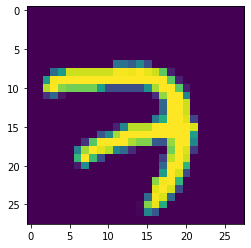

In [11]:
plt.imshow(x_train.reshape(-1, 28, 28)[0])

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [13]:
x_test, y_test = mnist.test.images, mnist.test.labels

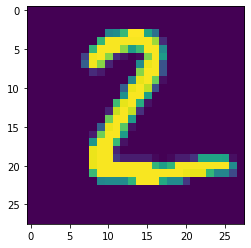

In [14]:
plt.imshow(x_test.reshape(-1, 28, 28)[1])

In [15]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

## Build input variables

In [16]:
X = tf.placeholder(tf.float32, shape=[None, 784])

In [17]:
Y = tf.placeholder(tf.float32, shape=[None, 10])

## Input Layer

In [18]:
input_layer = tf.reshape(tensor=X, shape=[-1, 28, 28, 1])

## Convolutional Layer 1

In [19]:
conv1 = tf.layers.conv2d(inputs=input_layer, filters=32, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)

In [22]:
conv1_pooling = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

## Convolutional Layer 2

In [23]:
conv2 = tf.layers.conv2d(inputs=conv1_pooling, filters=64, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)

In [24]:
conv2_pooling = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

## Dense Layer

In [25]:
conv2_pooling_flat = tf.reshape(conv2_pooling, shape=[-1, 7*7*64])

In [26]:
conv_flat = tf.layers.dense(inputs=conv2_pooling_flat, units=1024, activation=tf.nn.relu)

In [27]:
logit = tf.layers.dense(inputs=conv_flat, units=10)

In [29]:
y_estimated = tf.nn.softmax(logit)
guess = tf.argmax(logit, 1)

## Loss Function

In [32]:
cost = tf.losses.softmax_cross_entropy(onehot_labels=Y, logits=y_estimated)

In [34]:
learning_rate = 0.0001
training_epoch = 3000
batch_size = 128
display_step = 100

## Optimizer

In [35]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
model = optimizer.minimize(cost)

In [37]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [38]:
for step in range(training_epoch):
    x_data, y_data = mnist.train.next_batch(batch_size)
    sess.run(model, feed_dict={X: x_data, Y: y_data})
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(y_estimated, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    if step % display_step == 0:
        print("epoch = ", step, "accuracy = ", sess.run(accuracy, feed_dict={X: x_data, Y: y_data}), 
                "cost = ", sess.run(cost, feed_dict={X: x_data, Y: y_data}))

print("epoch = ", step+1, "accuracy = ", sess.run(accuracy, feed_dict={X: x_data, Y: y_data}),
         "cost = ", sess.run(cost, feed_dict={X: x_data, Y: y_data}))

epoch =  0 accuracy =  0.1875 cost =  2.2962022
epoch =  100 accuracy =  0.890625 cost =  1.616966
epoch =  200 accuracy =  0.9453125 cost =  1.5433753
epoch =  300 accuracy =  0.9140625 cost =  1.5584356
epoch =  400 accuracy =  0.921875 cost =  1.5456386
epoch =  500 accuracy =  0.9765625 cost =  1.501958
epoch =  600 accuracy =  0.953125 cost =  1.5172164
epoch =  700 accuracy =  0.9453125 cost =  1.5175722
epoch =  800 accuracy =  0.9765625 cost =  1.4920026
epoch =  900 accuracy =  0.9765625 cost =  1.4877597
epoch =  1000 accuracy =  0.9765625 cost =  1.4875276
epoch =  1100 accuracy =  0.96875 cost =  1.4991604
epoch =  1200 accuracy =  0.9765625 cost =  1.4889848
epoch =  1300 accuracy =  0.9765625 cost =  1.4920496
epoch =  1400 accuracy =  0.9453125 cost =  1.5257673
epoch =  1500 accuracy =  0.96875 cost =  1.4948232
epoch =  1600 accuracy =  0.96875 cost =  1.4930092
epoch =  1700 accuracy =  0.96875 cost =  1.4927555
epoch =  1800 accuracy =  0.984375 cost =  1.4798585
epo

In [39]:
print("accuracy = ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}),
         "cost = ", sess.run(cost, feed_dict={X: x_test, Y: y_test}))

accuracy =  0.9842 cost =  1.4779801


In [40]:
y_out = sess.run(y_estimated, feed_dict={X: x_test, Y: y_test})
guess_out = sess.run(guess, feed_dict={X: x_test, Y: y_test})

In [41]:
y_test[:100]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [42]:
y_out[0:100]

array([[1.24053805e-12, 2.32480210e-16, 1.73624712e-10, 7.85653498e-08,
        3.02002616e-17, 1.29786026e-12, 6.21811917e-25, 9.99999881e-01,
        6.83330942e-13, 4.03277989e-09],
       [8.10731950e-12, 2.02191942e-13, 1.00000000e+00, 5.07839539e-13,
        4.18127403e-27, 8.10611151e-20, 1.13057881e-16, 1.85878380e-23,
        1.01572159e-13, 2.15490345e-30],
       [2.90720300e-06, 9.99950886e-01, 1.48361255e-06, 1.65709508e-08,
        3.32197487e-05, 5.77814574e-10, 1.55251513e-07, 9.38231915e-06,
        2.01051762e-06, 1.13389680e-08],
       [1.00000000e+00, 1.98312642e-20, 5.46455069e-12, 1.69277721e-16,
        3.60466683e-17, 4.67760943e-12, 5.48490246e-12, 2.24859719e-15,
        9.49599150e-15, 1.06681114e-12],
       [1.34730909e-12, 2.93534084e-14, 1.57230779e-14, 4.08851739e-16,
        9.99998808e-01, 7.34731151e-14, 2.41218043e-13, 1.41644155e-10,
        2.62888756e-12, 1.21136884e-06],
       [1.47987521e-07, 9.99991655e-01, 2.56902446e-08, 2.34829378e-10,
   

In [43]:
guess_out.reshape(-1, 1)[:100]

array([[7],
       [2],
       [1],
       [0],
       [4],
       [1],
       [4],
       [9],
       [5],
       [9],
       [0],
       [6],
       [9],
       [0],
       [1],
       [5],
       [9],
       [7],
       [3],
       [4],
       [9],
       [6],
       [6],
       [5],
       [4],
       [0],
       [7],
       [4],
       [0],
       [1],
       [3],
       [1],
       [3],
       [4],
       [7],
       [2],
       [7],
       [1],
       [2],
       [1],
       [1],
       [7],
       [4],
       [2],
       [3],
       [5],
       [1],
       [2],
       [4],
       [4],
       [6],
       [3],
       [5],
       [5],
       [6],
       [0],
       [4],
       [1],
       [9],
       [5],
       [7],
       [8],
       [9],
       [3],
       [7],
       [4],
       [6],
       [4],
       [3],
       [0],
       [7],
       [0],
       [2],
       [9],
       [1],
       [7],
       [3],
       [2],
       [9],
       [7],
       [7],
       [6],
       [2],
    